In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix, plot_confusion_matrix

import matplotlib.pyplot as plt

In [2]:
data = pd.read_pickle("../../../data/03_training_set/training_set.pkl")

bins = (-np.inf, 0, 15, 35, 75, 200, np.inf)
group_names = ['0.brak', '1.bardzo mało', '2.mało', '3.średnio', '4.dużo', '5.bardzo dużo']
data['new_watchers'] = pd.cut(data['new_watchers'], bins=bins, labels=group_names)

labels = LabelEncoder()
data['new_watchers'] = labels.fit_transform(data['new_watchers'])

X = data.drop(['new_watchers'], axis=1)
y = data['new_watchers']

s = StandardScaler()
X = s.fit_transform(X)

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.20, random_state=42)

# Las losowy

W przypadku lasu losowego testowałem wiele wariantów, jednak nie ma znaczących różnic w wynikach, zatem zdecydowałem się zostawić tylko domyślny zestaw parametrów.

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [4]:
def model_summary(model, name, labels, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    
    # podsumowanie wynikow
    print(f'Model: {name}')
    y_pred_default = model.predict(X_test).astype(int)
    mse = mean_squared_error(y_test, y_pred_default)
    train_s = model.score(X_train, y_train)
    test_s = model.score(X_test, y_test)
    cm = confusion_matrix(y_test, y_pred_default)
    print(f'mean_squared_error: {mse}')
    print(f'train score: {train_s}')
    print(f'test score: {test_s}')
    print(classification_report(y_test, y_pred_default, target_names=labels))
    print(f'confusion_matrix: \n{cm}')
    print('\n\n')
    fig, ax = plt.subplots(figsize=(10, 10))
    plot_confusion_matrix(model, X_test, y_test, 
                          normalize='true', 
                          display_labels=labels,
                          cmap=plt.cm.Blues, 
                          ax=ax)
    plt.title(f'Confusion matrix for {name}', fontsize=20)
    plt.xlabel('Przewidywana wartość', fontsize=15)
    plt.ylabel('Rzeczywista wartość', fontsize=15)
    plt.show()
    return mse, train_s, test_s, cm

In [5]:
models = [
    DecisionTreeClassifier(), # OK
    DecisionTreeClassifier(max_depth=5), # OK
    RandomForestClassifier(n_jobs=6),
    AdaBoostClassifier(),  # OK
]

names = [
    "Decision Tree v1",
    "Decision Tree v2",
    "Random Forest",
    "AdaBoost",
]

In [6]:
mean_squared_errors = []
train_scores = []
test_scores = []
confussion_matrices = []

Model: Decision Tree v1
mean_squared_error: 0.0017093733862438246
train score: 0.9999827405280017
test score: 0.9995333051659528
               precision    recall  f1-score   support

       0.brak       1.00      1.00      1.00    361543
1.bardzo mało       0.80      0.73      0.76       133
       2.mało       0.66      0.70      0.68       125
    3.średnio       0.78      0.75      0.77       162
       4.dużo       0.81      0.78      0.79       129
5.bardzo dużo       0.61      0.48      0.54        29

     accuracy                           1.00    362121
    macro avg       0.78      0.74      0.76    362121
 weighted avg       1.00      1.00      1.00    362121

confusion_matrix: 
[[361531      6      1      1      1      3]
 [    17     97     18      1      0      0]
 [     2     17     88     14      4      0]
 [     0      1     22    122     17      0]
 [     1      1      3     18    100      6]
 [    12      0      1      0      2     14]]





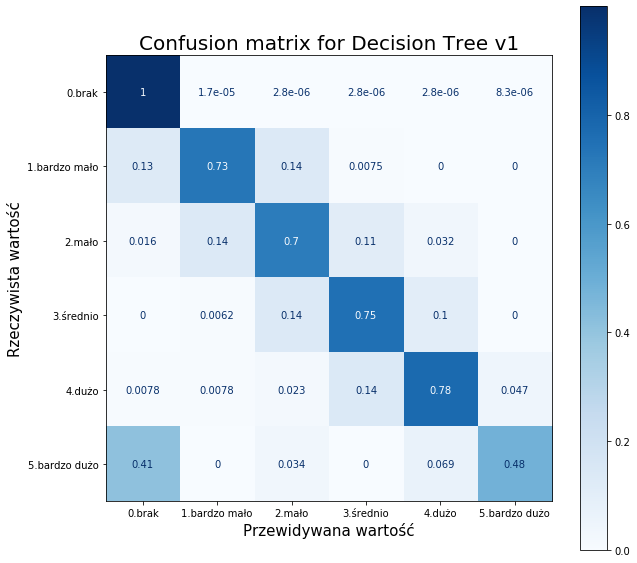

Model: Decision Tree v2
mean_squared_error: 0.0028056920200706394
train score: 0.9992191814868
test score: 0.9991577400924001
               precision    recall  f1-score   support

       0.brak       1.00      1.00      1.00    361543
1.bardzo mało       0.58      0.58      0.58       133
       2.mało       0.28      0.14      0.18       125
    3.średnio       0.47      0.70      0.56       162
       4.dużo       0.58      0.62      0.60       129
5.bardzo dużo       1.00      0.17      0.29        29

     accuracy                           1.00    362121
    macro avg       0.65      0.53      0.54    362121
 weighted avg       1.00      1.00      1.00    362121

confusion_matrix: 
[[361524      5      5      4      5      0]
 [     7     77     17     21     11      0]
 [     1     34     17     62     11      0]
 [     1     11     16    113     21      0]
 [     1      5      5     38     80      0]
 [    12      0      0      1     11      5]]





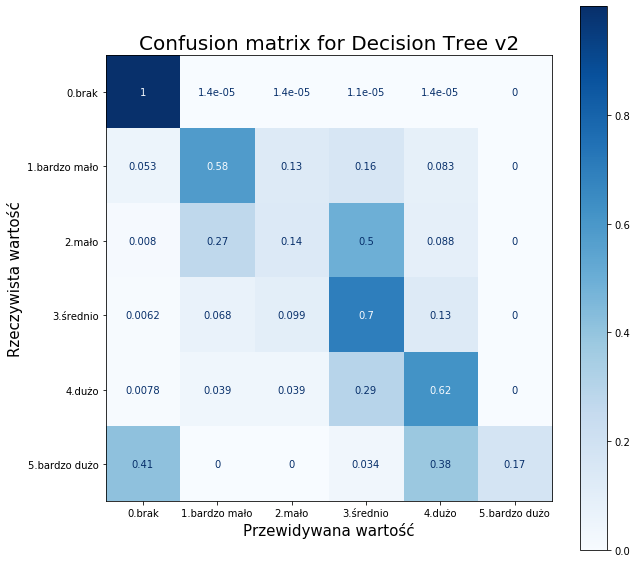

Model: Random Forest
mean_squared_error: 0.0013255237890097509
train score: 0.9999827405280017
test score: 0.9996189119106597
               precision    recall  f1-score   support

       0.brak       1.00      1.00      1.00    361543
1.bardzo mało       0.81      0.81      0.81       133
       2.mało       0.73      0.73      0.73       125
    3.średnio       0.79      0.81      0.80       162
       4.dużo       0.86      0.84      0.85       129
5.bardzo dużo       0.92      0.38      0.54        29

     accuracy                           1.00    362121
    macro avg       0.85      0.76      0.79    362121
 weighted avg       1.00      1.00      1.00    362121

confusion_matrix: 
[[361533     10      0      0      0      0]
 [    10    108     14      1      0      0]
 [     0     15     91     17      2      0]
 [     0      1     19    132     10      0]
 [     1      0      1     18    108      1]
 [    13      0      0      0      5     11]]





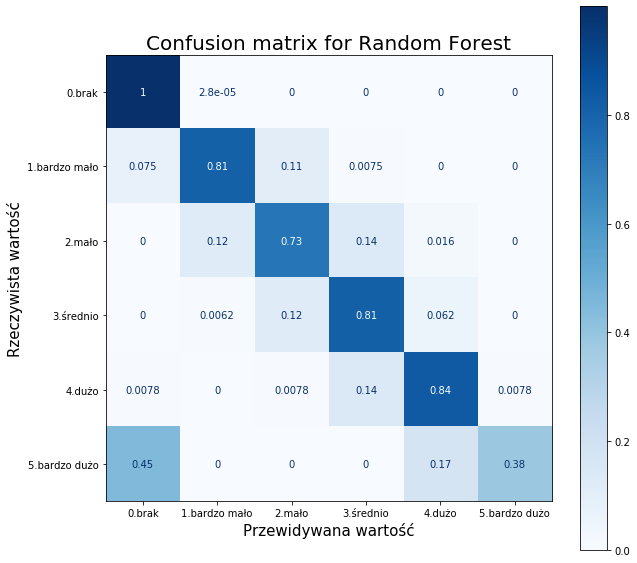

Model: AdaBoost
mean_squared_error: 0.0038495420039158183
train score: 0.9988387827239589
test score: 0.9988318821609351
               precision    recall  f1-score   support

       0.brak       1.00      1.00      1.00    361543
1.bardzo mało       0.39      0.30      0.34       133
       2.mało       0.28      0.39      0.32       125
    3.średnio       0.33      0.42      0.37       162
       4.dużo       0.61      0.33      0.43       129
5.bardzo dużo       0.19      0.10      0.13        29

     accuracy                           1.00    362121
    macro avg       0.46      0.42      0.43    362121
 weighted avg       1.00      1.00      1.00    362121

confusion_matrix: 
[[361495      8      4     32      4      0]
 [    23     40     48     21      1      0]
 [     8     29     49     37      2      0]
 [     9     26     50     68      9      0]
 [     1      0     26     46     43     13]
 [    12      0      1      1     12      3]]





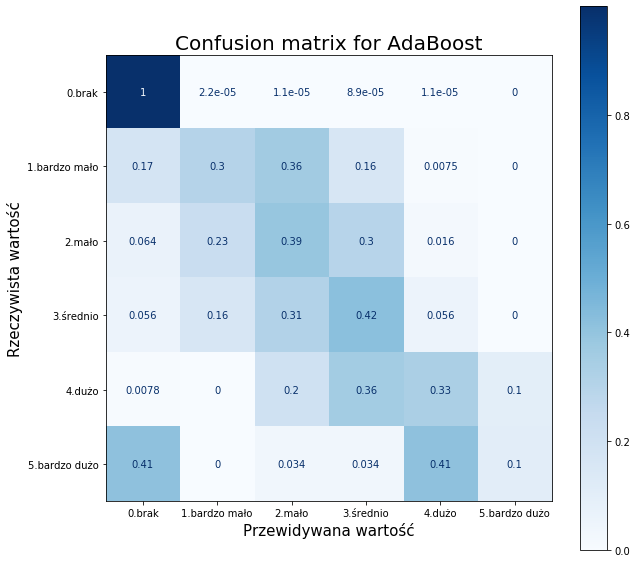

In [7]:
for model, name in zip(models, names):
    mse, train_s, test_s, cm = model_summary(model, name, group_names, X_train, X_test, y_train, y_test)
    mean_squared_errors.append(mse)
    train_scores.append(train_s)
    test_scores.append(test_s)
    confussion_matrices.append(cm)

In [8]:
confussion_matrices

[array([[361531,      6,      1,      1,      1,      3],
        [    17,     97,     18,      1,      0,      0],
        [     2,     17,     88,     14,      4,      0],
        [     0,      1,     22,    122,     17,      0],
        [     1,      1,      3,     18,    100,      6],
        [    12,      0,      1,      0,      2,     14]], dtype=int64),
 array([[361524,      5,      5,      4,      5,      0],
        [     7,     77,     17,     21,     11,      0],
        [     1,     34,     17,     62,     11,      0],
        [     1,     11,     16,    113,     21,      0],
        [     1,      5,      5,     38,     80,      0],
        [    12,      0,      0,      1,     11,      5]], dtype=int64),
 array([[361533,     10,      0,      0,      0,      0],
        [    10,    108,     14,      1,      0,      0],
        [     0,     15,     91,     17,      2,      0],
        [     0,      1,     19,    132,     10,      0],
        [     1,      0,      1,     18,  